In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import measure
from skimage.measure import label, regionprops
from scipy.ndimage import binary_dilation

In [2]:
img1 = plt.imread('./3A.tif')

img2 = plt.imread('./3B.tif')

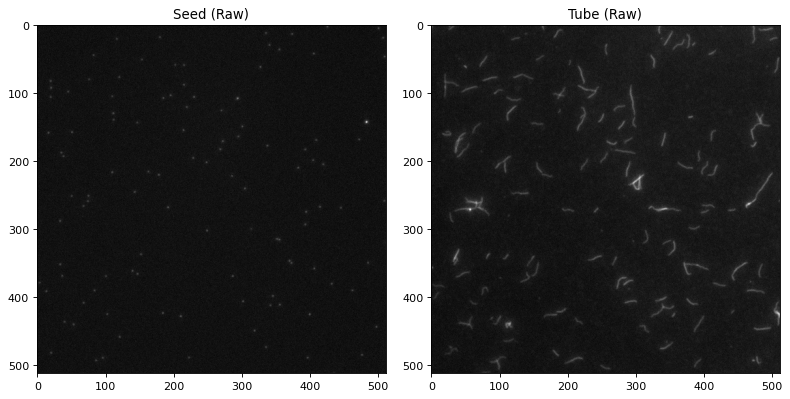

In [3]:
fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Seed (Raw)")
plt.imshow(img1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Tube (Raw)")
plt.imshow(img2, cmap="gray")

plt.tight_layout()
plt.show()

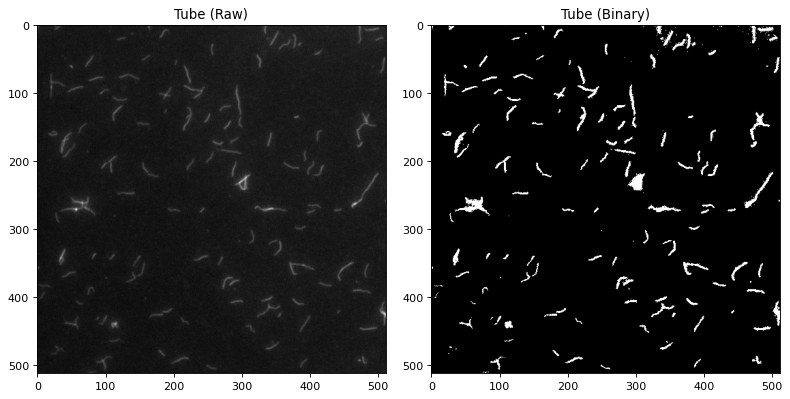

In [4]:
binary = img2 > (img2.mean() + 2*img2.std())

fig = plt.figure(figsize=(10, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Tube (Raw)")
plt.imshow(img2, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Tube (Binary)")
plt.imshow(binary, cmap="gray")

plt.tight_layout()
plt.show()

In [5]:
# use labeling function to identify connected blobs
label_im = label(binary)
tube_lists = regionprops(label_im)

tube_lists = [i for i in tube_lists if i.area > 10 and i.area < 250]

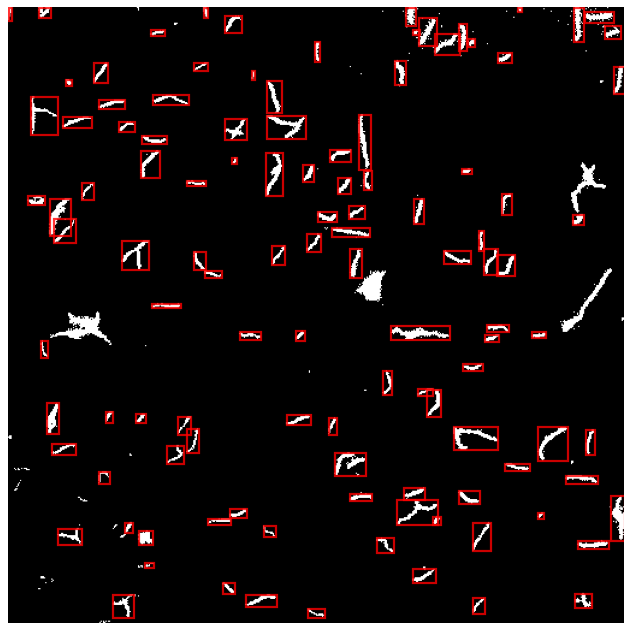

In [8]:
figure = plt.figure(figsize=(8, 8), dpi = 80)

ax = plt.subplot(1,1,1)
    
plt.imshow(binary, cmap="gray")

ctr = 0
for i in tube_lists:
#     print(ctr, i.area)
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    ax.set_axis_off()
    ctr += 1

plt.tight_layout()
plt.show()

In [ ]:
tube = tube_lists[16]
minr, minc, maxr, maxc = tube.bbox

cropped = img2[minr:maxr, minc:maxc]

contours = measure.find_contours(tube.image, .5, fully_connected = 'high')
contours

plt.imshow(cropped, cmap = "gray")

plt.imshow(tube.image, cmap = "gray", alpha = .3)

for contour in contours:
    plt.scatter(contour[:, 1], contour[:, 0], linewidth=5)

In [ ]:
from scipy.ndimage import gaussian_filter

plt.imshow(tube.image, cmap = "gray")

In [ ]:
plt.imshow(gaussian_filter(tube.image, sigma = 0.1), cmap = "gray")

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [ ]:
tube = tube_lists[16] # perfect: 7 16 17 18 ... ; branched: 8 13 
minr, minc, maxr, maxc = tube.bbox

cropped = img2[minr:maxr, minc:maxc]

fig = plt.figure(figsize=(8, 15), dpi = 100)

plt.subplot(1,3,1)
plt.imshow(cropped, cmap = "gray")

skeleton = skeletonize(tube.image)

plt.subplot(1,3,2)
plt.imshow(skeleton, cmap = "gray")

contours = measure.find_contours(skeleton, .5, fully_connected = 'high')

plt.subplot(1, 3, 3)
plt.imshow(cropped, cmap = "gray")

for contour in contours:
    plt.scatter(contour[:, 1], contour[:, 0], s=15)
    
plt.tight_layout()
plt.show()


In [ ]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def contour_length(data):
    val = 0
    for i in range(len(data)):
        if i != len(data) - 1:
            val += dist(data[i, 0], data[i, 1], data[i+1, 0], data[i+1, 1])
#         else:
#             val += dist(data[i, 0], data[i, 1], data[0, 0], data[0, 1])
    return val/2
            
contour_length(contour)

In [ ]:
lengths = []

for tube in tube_lists:
    
    skeleton = skeletonize(tube.image)
    contours = measure.find_contours(skeleton, .5, fully_connected = 'high')
    ct_length = np.sum([contour_length(contour) for contour in contours])
    lengths.append(ct_length)

In [ ]:
plt.hist(lengths, bins = 30)
plt.show()

In [ ]:
import cv2 
import numpy as np 

# Read image 
image = cv2.imread("3A.tif") 

In [ ]:
cv2.imshow("test", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()